In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem import PorterStemmer
import matplotlib.ticker as mtick
from urllib.parse import urlparse

In [186]:
df_train = pd.read_csv('train.csv')

In [187]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [188]:
df_train.shape

(7613, 5)

# Relación entre los twits que tienen links y los desastres

In [189]:
def hasLinks(string): 
    links = re.findall("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", string) 
    return len(links) > 0

In [190]:
df = df_train
df['has_links'] = df['text'].apply(hasLinks)
df

,id,keyword,location,text,target,has_links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,False
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,False


In [191]:
df = df.groupby(['target','has_links']).count()
df

id  keyword  location  text
target has_links                               
0      False      2543     2525      1635  2543
       True       1799     1798      1249  1799
1      False      1099     1076       729  1099
       True       2172     2153      1467  2172

In [192]:
df = df.reset_index().rename(columns={'id':'cantidad'})
df

,target,has_links,cantidad,keyword,location,text
0,0,False,2543,2525,1635,2543
1,0,True,1799,1798,1249,1799
2,1,False,1099,1076,729,1099
3,1,True,2172,2153,1467,2172


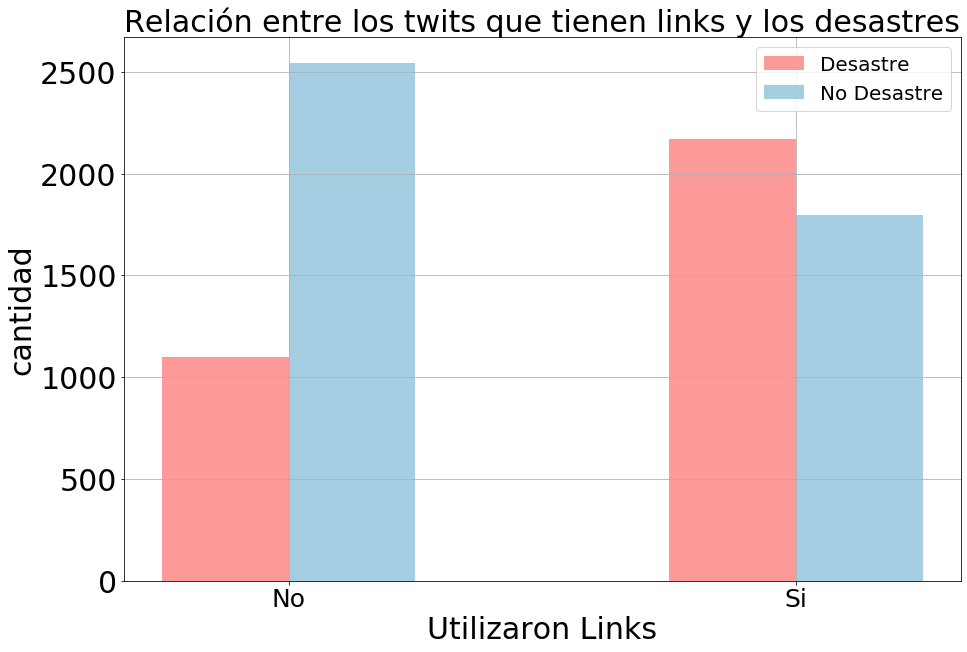

In [193]:
plt.figure(figsize=[15,10])
x=np.arange(2)
y=['No','Si']
plt.bar(x,df[df['target']==1]['cantidad'], width = 0.25,color=plt.cm.Paired(4),label='Desastre')
plt.bar(x+0.25,df[df['target']==0]['cantidad'], width = 0.25,color=plt.cm.Paired(0),label='No Desastre')
plt.grid(True)
plt.xticks([0.125,1.125],y,size=25) 
plt.yticks(size=30)
plt.title('Relación entre los twits que tienen links y los desastres',size=30)
plt.xlabel('Utilizaron Links',size=30)
plt.ylabel('cantidad',size=30)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.2, 0.5),prop={'size': 20})
plt.show()

# Relación entre los twits que tienen links y la veracidad de los mismos

# Qué relación hay entre los twits que tienen etiquetas y los desastres

In [194]:
df_train

,id,keyword,location,text,target,has_links
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,True
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,False
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,False


In [195]:
df = df_train
df['has_tag'] = df['text'].str.contains('@', regex=True)
df

,id,keyword,location,text,target,has_links,has_tag
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False,False
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,True,False
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,False,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True,False
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,False,False


In [196]:
df = df.groupby(['target','has_tag']).count()
df

id  keyword  location  text  has_links
target has_tag                                          
0      False    2979     2960      1918  2979       2979
       True     1363     1363       966  1363       1363
1      False    2595     2555      1711  2595       2595
       True      676      674       485   676        676

In [197]:
df = df.reset_index().rename(columns={'id':'cantidad'})
df

,target,has_tag,cantidad,keyword,location,text,has_links
0,0,False,2979,2960,1918,2979,2979
1,0,True,1363,1363,966,1363,1363
2,1,False,2595,2555,1711,2595,2595
3,1,True,676,674,485,676,676


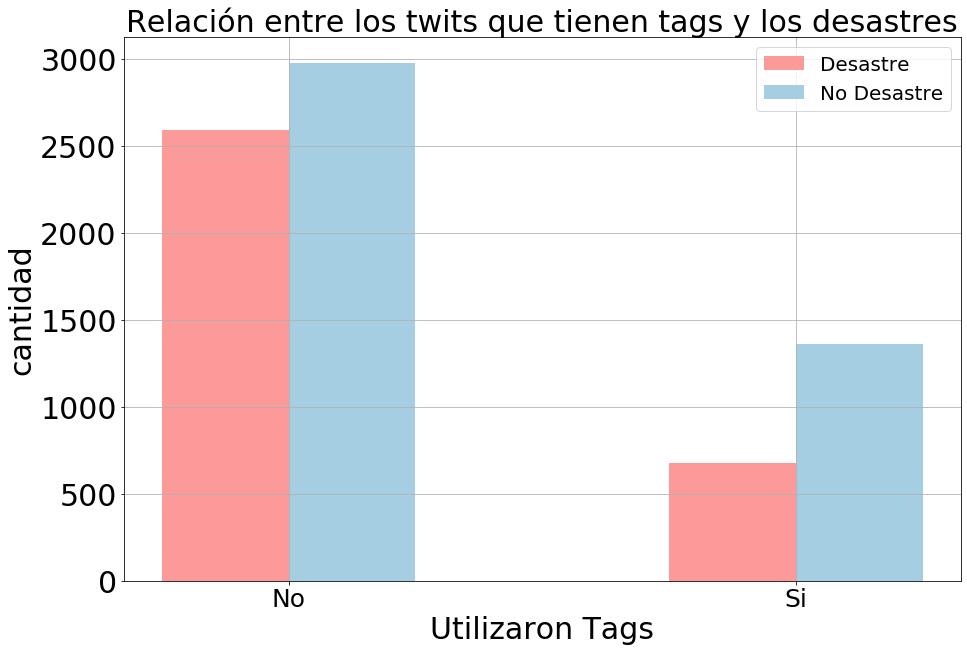

In [198]:
plt.figure(figsize=[15,10])
x=np.arange(2)
y=['No','Si']
plt.bar(x,df[df['target']==1]['cantidad'], width = 0.25,color=plt.cm.Paired(4),label='Desastre')
plt.bar(x+0.25,df[df['target']==0]['cantidad'], width = 0.25,color=plt.cm.Paired(0),label='No Desastre')
plt.grid(True)
plt.xticks([0.125,1.125],y,size=25)
plt.yticks(size=30)
plt.title('Relación entre los twits que tienen tags y los desastres',size=30)
plt.xlabel('Utilizaron Tags',size=30)
plt.ylabel('cantidad',size=30)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.2, 0.5),prop={'size': 20})
plt.show()

# Relación entre los twits que tienen links y la veracidad de los mismos

# Relación entre los twits que tienen localización y los desastres

In [199]:
df = df_train
df

,id,keyword,location,text,target,has_links,has_tag
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,False,False
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,False,False
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,False,False
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,False,False
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,False,False
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,True,False
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,False,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True,False
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,False,False


In [200]:
df['location'] = df['location'].fillna('None')
df

,id,keyword,location,text,target,has_links,has_tag
0,1,NaN,None,Our Deeds are the Reason of this #earthquake M...,1,False,False
1,4,NaN,None,Forest fire near La Ronge Sask. Canada,1,False,False
2,5,NaN,None,All residents asked to 'shelter in place' are ...,1,False,False
3,6,NaN,None,"13,000 people receive #wildfires evacuation or...",1,False,False
4,7,NaN,None,Just got sent this photo from Ruby #Alaska as ...,1,False,False
...,...,...,...,...,...,...,...
7608,10869,NaN,None,Two giant cranes holding a bridge collapse int...,1,True,False
7609,10870,NaN,None,@aria_ahrary @TheTawniest The out of control w...,1,False,True
7610,10871,NaN,None,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,True,False
7611,10872,NaN,None,Police investigating after an e-bike collided ...,1,False,False


In [201]:
df['has_location'] = df['location'].str.contains('None', regex=False)
df.tail(50)

,id,keyword,location,text,target,has_links,has_tag,has_location
7563,10812,wrecked,None,I wrecked my stomach help,0,False,False,True
7564,10813,wrecked,None,@__ohhmyjoshh @stevenrulles he not gonna be th...,0,False,True,True
7565,10814,wrecked,None,Wrecked tired but not gonna be asleep before 3??,0,False,False,True
7566,10815,wrecked,United States,http://t.co/qVx0VQTPz0 Cramer: Iger's 3 words ...,0,True,False,False
7567,10817,wrecked,At your back,Wrecked emotions.,0,False,False,False
7568,10818,wrecked,None,The Riddler would be the best early-exit prima...,0,False,False,True
7569,10819,wrecked,"Livingston, MT",@marynmck That's beyond adorable. I hope it wo...,0,False,True,False
7570,10821,wrecked,California,Cramer: Iger's 3 words that wrecked Disney's s...,0,True,False,False
7571,10822,wrecked,Glasgow,@Caitsroberts see U the night wee bArra to get...,0,False,True,False
7572,10823,wrecked,"Manhattan, NY",@Kirafrog @mount_wario Did you get wrecked again?,1,False,True,False


In [202]:
df = df.groupby(['target','has_location']).count()
df

id  keyword  location  text  has_links  has_tag
target has_location                                                   
0      False         2883     2883      2883  2883       2883     2883
       True          1459     1440      1459  1459       1459     1459
1      False         2196     2196      2196  2196       2196     2196
       True          1075     1033      1075  1075       1075     1075

In [203]:
df = df.reset_index().rename(columns={'id':'cantidad'})
df

,target,has_location,cantidad,keyword,location,text,has_links,has_tag
0,0,False,2883,2883,2883,2883,2883,2883
1,0,True,1459,1440,1459,1459,1459,1459
2,1,False,2196,2196,2196,2196,2196,2196
3,1,True,1075,1033,1075,1075,1075,1075


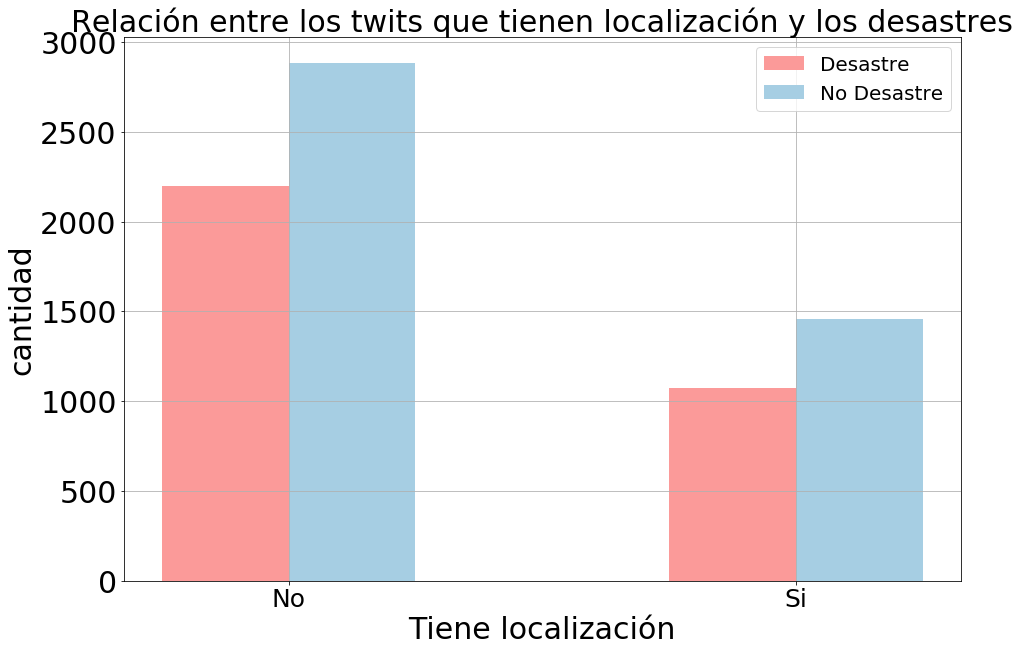

In [205]:
plt.figure(figsize=[15,10])
x=np.arange(2)
y=['No','Si']
plt.bar(x,df[df['target']==1]['cantidad'], width = 0.25,color=plt.cm.Paired(4),label='Desastre')
plt.bar(x+0.25,df[df['target']==0]['cantidad'], width = 0.25,color=plt.cm.Paired(0),label='No Desastre')
plt.grid(True)
plt.xticks([0.125,1.125],y,size=25)
plt.yticks(size=30)
plt.title('Relación entre los twits que tienen localización y los desastres',size=30)
plt.xlabel('Tiene localización',size=30)
plt.ylabel('cantidad',size=30)
plt.legend(bbox_to_anchor=(0.8, 0.5, 0.2, 0.5),prop={'size': 20})
plt.show()